In [10]:
import numpy as np
from scipy.special import comb
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import hypergeom
from scipy.stats import fisher_exact
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import ttest_1samp
from scipy.stats import chi2
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [ ]:
n, p = 31000, 0.00203
k = 63
bin_coef = comb(n, k)
x = bin_coef * (p**k) * (1-p)**(n-k)
print(x)

### Binomial and Poisson distributions

In [ ]:
fig, ax = plt.subplots(2, 1)
x = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.99, n, p))

ax[0].plot(x, binom.pmf(x, n, p), 'bo', ms=2, label='binom pmf')
ax[0].vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=1, alpha=0.5)
# ax[0].set_xlim((0, 200))

lmbda = n * p
x = np.arange(poisson.ppf(0.01, lmbda), poisson.ppf(0.99, lmbda))

ax[1].plot(x, poisson.pmf(x, lmbda), 'bo', ms=2, label='poisson pmf')
ax[1].vlines(x, 0, poisson.pmf(x, lmbda), colors='b', lw=1, alpha=0.5)
# ax[1].set_xlim((0, 200))

plt.show()


### Hypothesis Testing and p-value

In [ ]:
# Threshold for which we would reject H_0 with significance level 0.05
significance_level = 0.05
n, p = 31000, 0.00203
k = 63
threshold_binom = binom.ppf(significance_level, n, p)
print('We would reject H_0 if the test statistic T <=', threshold_binom)
p_value_binom = round(binom.cdf(39, n, p), 4)
print('p-value (Binomial Test):', p_value_binom)

lmbda = n * p
threshold_poisson = poisson.ppf(significance_level, lmbda)
print('We would reject H_0 if the test statistic T <=', threshold_poisson)
p_value_poisson = round(poisson.cdf(39, lmbda), 4)
print('p-value (Poisson Test):', p_value_poisson)

In [ ]:
H_0_rate = 39
H_A_rate = 63
sample_size_H_0 = 31000
sample_size_H_A = 31000

p_value = 0
for nb in range(H_0_rate):
    p_value += hypergeom.cdf(nb, (sample_size_H_0 + sample_size_H_A), sample_size_H_0, (H_0_rate + H_A_rate))

print('p-value for Hypergeom P(T<=39)', round(p_value, 4))


### Fisher's Exact Test

In [ ]:
N = 62000
K = 31000
target_treatment = 39
target_control = 63
other_treatment = K - target_treatment
other_control = (N - K) - target_control

contingency_table = [[target_treatment, target_control], [other_treatment, other_control]]

oddsratio, p_value = fisher_exact(contingency_table, 'less')
print('p-value for Fisher\'s Exact Test:', round(p_value, 4))


T= -3.0268
p-value= 0.0012


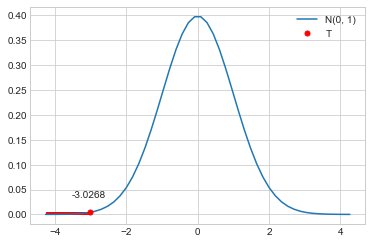

In [17]:
N = 62000
K = 31000
target_treatment = 39
target_control = 63

# z-test
X_bar = target_treatment / K
mu = target_control / (N - K)
sigma = np.sqrt(mu * (1 - mu))

T = np.sqrt(K) * ((X_bar - mu) / sigma)
print('T=', round(T, 4))

p_value = norm.cdf(T, 0, 1)
print('p-value=', round(p_value, 4))

# plot distribution and p-value
fix, ax = plt.subplots(1, 1)
x = np.linspace(norm.ppf(0.00001, 0, 1), norm.ppf(0.99999, 0, 1))
ax.plot(x, norm.pdf(x, 0, 1), label='N(0, 1)')
ax.plot(T, norm.pdf(T, 0, 1), 'ro', markersize=5, label='T')
ax.fill_between(x, norm.pdf(T, 0, 1), where=x<=T, color='r')
ax.annotate(round(T, 4), (T-.5, norm.pdf(T, 0, 1) + 0.03))

plt.legend(loc='best')
plt.show()

### T Test

In [31]:
data = [0.9, -0.9, 4.3, 2.9, 1.2, 3.0, 2.7, 0.6, 3.6, -0.5]
sample_mean = np.mean(data)
sample_sd = np.sqrt(np.var(data))
print(sample_mean, sample_sd)

sv = 0
for datapoint in data:
    sv += (datapoint - sample_mean) ** 2
sv /= (len(data) - 1)
print(np.sqrt(sv))

#t-test
T = np.sqrt(len(data)) * (sample_mean / np.sqrt(sv))
print('T =', T)
p_value = t.cdf(T, len(data) - 1, 0, 1)
print('p-value:', round(1 - p_value, 5))

## or
t_stats, p_value = ttest_1samp(data, popmean=0)
p_value /= 2
print('p-value:', round(p_value, 5))

1.78 1.6773789077009404
1.7681126158201075
T = 3.183538302218873
p-value: 0.00556
p-value: 0.00556


### Likelihood Ratio Test

In [24]:
n = 62000
y_t = 39
y_c = 63

mle = lambda k, n: k/n

mle_p = mle(y_t + y_c, n)
mle_p_t = mle(y_t, n/2)
mle_p_c = mle(y_c, n/2)

print(round(mle_p, 4), round(mle_p_t, 4), round(mle_p_c, 4))

lmbda = -2 * np.log((binom.pmf(y_t, n/2, mle_p) * binom.pmf(y_c, n/2, mle_p)) / (binom.pmf(y_t, n/2, mle_p_t) * binom.pmf(y_c, n/2, mle_p_c)))
print('Likelihood Ratio Statistic =', round(lmbda, 3))

p_value = 1 - chi2.cdf(lmbda, 1)
print('p-value for Likelihood Ratio test:', round(p_value, 4))
print(round(chi2.sf(lmbda, 1), 4))


0.0016 0.0013 0.002
Likelihood Ratio Statistic = 5.71
p-value for Likelihood Ratio test: 0.0169
0.0169
